## @Tektrnoix scope data: csv file load and fft(Sensor Signal)

## 1. 파이썬 모듈 불러오기

In [49]:
#Python 모듈
import os 
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')


# 데이터 전처리 모듈
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


# 시각화 모듈
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import mplcursors
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#한글 폰트 설정 모듈
plt.rc('font', family='Malgun Gothic')


# 이미지 파일 불러오기 모듈
from IPython.display import Image

## 2. 데이터 경로 설정하기

In [50]:
os.chdir("C:/Users/taeyu") #데이터 경로
print(os.getcwd())

C:\Users\taeyu


## 3. csv 파일 불러오기(Tektrnoix MSO54 모델 설정)

In [51]:
df = pd.read_csv('signal.csv', header=None, index_col = False, skiprows=22) # Dataframe 데이터 , skiprows=1

In [52]:
df.head()

,0,1
0,-0.000005,0.0
1,-0.000005,0.0
2,-0.000005,0.0
3,-0.000005,0.0
4,-0.000005,0.0


## 4. 데이터 정보(Raw_data)

In [53]:
n_samples = len(df[0])
print('sample length :',n_samples)

dt = df.iloc[2,0] - df.iloc[1,0]
print('Samling time :',dt)

time_f= 1/dt
print('Samling Frequency :',time_f)

sample length : 62500
Samling time : 1.6000000000018143e-10
Samling Frequency : 6249999999.992913


## 5. 데이터 형변환(DataFrame -> nparray

In [54]:
data = df.to_numpy()

## 6. Time domain 시각화

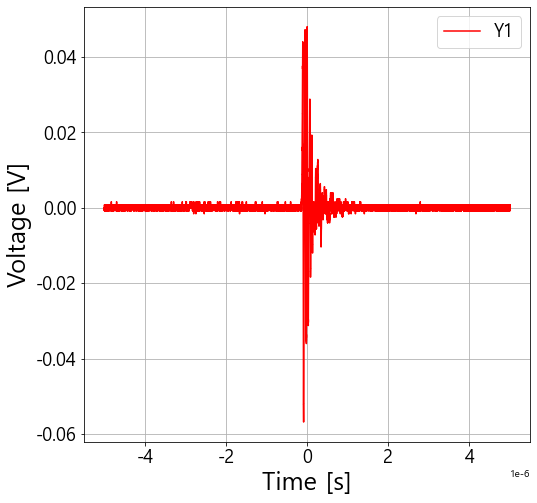

In [55]:
X = data[:,0]
Y1 = data[:,1]

plt.figure(figsize=(8,8))
plt.plot(X,Y1,'r', label='Y1')
plt.xlabel("Time [s]", fontsize=25)
plt.ylabel("Voltage [V]", fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize = 18)
plt.grid()

## 7. 신호의 퓨리에 변환(FFFT)

In [56]:
fft = np.fft.fft(Y1) / len(Y1)  
fft_magnitude = abs(fft)

length = len(Y1)
f = (np.linspace(-(time_f / 2), time_f / 2, n_samples))*10*10**-6
f_Y = np.fft.fftshift(fft_magnitude)


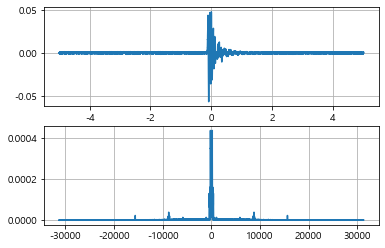

In [57]:
plt.subplot(2,1,1)
plt.plot(X,Y1)
plt.grid()
 
plt.subplot(2,1,2)
plt.plot(f, np.fft.fftshift(fft_magnitude)) 
plt.grid()
plt.show()

## 8. FFT 시각화

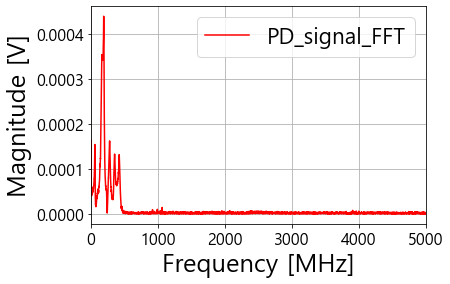

In [58]:
plt.figure()
plt.plot(f,f_Y,'r', label='PD_signal_FFT')
plt.xlabel("Frequency [MHz]", fontsize=25)
plt.ylabel("Magnitude [V]", fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0, 5000])
#plt.ylim([0, 0.0005])
plt.legend(fontsize = 22)
plt.grid()
plt.show()